https://github.com/arthur-e/Programming-Collective-Intelligence/blob/master


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# A dictionary of movie critics and their ratings of a small set of movies

critics = {
    'Lisa Rose': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'Superman Returns': 3.5,
        'You, Me and Dupree': 2.5,
        'The Night Listener': 3.0,
    },
    'Gene Seymour': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 3.5,
        'Just My Luck': 1.5,
        'Superman Returns': 5.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 3.5,
    },
    'Michael Phillips': {
        'Lady in the Water': 2.5,
        'Snakes on a Plane': 3.0,
        'Superman Returns': 3.5,
        'The Night Listener': 4.0,
    },
    'Claudia Puig': {
        'Snakes on a Plane': 3.5,
        'Just My Luck': 3.0,
        'The Night Listener': 4.5,
        'Superman Returns': 4.0,
        'You, Me and Dupree': 2.5,
    },
    'Mick LaSalle': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'Just My Luck': 2.0,
        'Superman Returns': 3.0,
        'The Night Listener': 3.0,
        'You, Me and Dupree': 2.0,
    },
    'Jack Matthews': {
        'Lady in the Water': 3.0,
        'Snakes on a Plane': 4.0,
        'The Night Listener': 3.0,
        'Superman Returns': 5.0,
#         'You, Me and Dupree': 3.5,
        'You, Me and Dupree': 1.5,
    },
    'Toby': {'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0,
             'Superman Returns': 4.0},
}


# 1. Similarity

## Euclidean distance

$$
distance = \frac{1}{1 +\sum (x_i - y_i)^2}
$$

In [3]:
def similar_distance(prefs, person1, person2):
    '''
    Returns a distance-based similarity score for person1 and person2.
    '''
    
    pref1 = prefs[person1]
    pref2 = prefs[person2]
    
    movies1 = pref1.keys()
    movies2 = pref2.keys()
    shared_movies = list(set(movies1) & set(movies2))

    if len(shared_movies) == 0:
        return 0
    

    scores = sum([ (pref1[m] - pref2[m])**2 for m in shared_movies ])

    return 1 / (1 + scores)
        

In [4]:
similar_distance(critics, 'Lisa Rose', 'Gene Seymour')


0.14814814814814814

## Pearson Correlation Score

The correlation coefficient is a measure of how well two sets of data fit on a straight line.

If one is inclined to give higher scores than the other, there can still be perfect correlation if the difference between their scores is consistent. (relatively similar preference)

However, Euclidean distance will say that the two persons are dissimilar.


$$
r_{xy} = \frac{\sum x_iy_i - n \hat x\hat y}{(n-1)s_xs_y}
$$

In [5]:

def plotPearson(per1, per2, ax):
    movies_1= critics[per1]
    movies_2 = critics[per2]
    shared_movies = list(set(movies_1.keys()) & set(movies_2.keys()))

    x = [movies_1[m] for m in shared_movies]
    y = [movies_2[m] for m in shared_movies]

    sns.scatterplot(x=x, y=y, ax=ax)
    ax.set_xlim(1, 6)
    ax.set_ylim(1, 6)
    ax.set_xlabel(per1)
    ax.set_ylabel(per2)


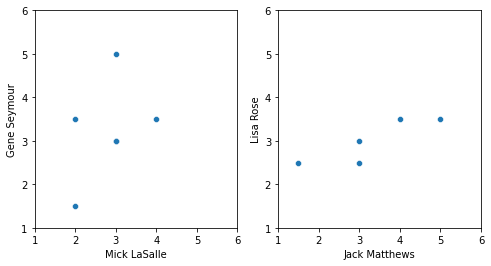

In [6]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
plotPearson('Mick LaSalle', 'Gene Seymour', ax=ax[0])
plotPearson('Jack Matthews', 'Lisa Rose', ax=ax[1])


In [15]:
def similar_pearson(prefs, person1, person2):
    pref1 = prefs[person1]
    pref2 = prefs[person2]
    
    movies1 = pref1.keys()
    movies2 = pref2.keys()
    shared_movies = list(set(movies1) & set(movies2))

    if len(shared_movies) == 0:
        return 0
    
    n = len(shared_movies)
    s1 = [pref1[m] for m in shared_movies]
    s2 = [pref2[m] for m in shared_movies]
    s12 = sum([pref1[m]*pref2[m] for m in shared_movies])
    x_mean = np.mean(s1)
    y_mean = np.mean(s2)
    print(person1, x_mean, person2, y_mean)
    s_x = np.sqrt(sum([(pref1[m] - x_mean)**2 for m in shared_movies]) / (n - 1))
    s_y = np.sqrt(sum([(pref2[m] - y_mean)**2 for m in shared_movies]) / (n - 1))

    return (s12-n*x_mean*y_mean)/((n-1)*s_x*s_y)
    

In [16]:
for m1, m2 in [
        ['Mick LaSalle', 'Gene Seymour'],
        ['Jack Matthews', 'Lisa Rose'],
        ['Lisa Rose', 'Gene Seymour']
    ]:    
    print(f'{m1}, {m2}:', similar_pearson(critics, m1, m2))


Mick LaSalle 2.8333333333333335 Gene Seymour 3.25
Mick LaSalle, Gene Seymour: 0.41176470588235303
Jack Matthews 3.3 Lisa Rose 3.0
Jack Matthews, Lisa Rose: 0.8628356124532918
Lisa Rose 3.0 Gene Seymour 3.25
Lisa Rose, Gene Seymour: 0.39605901719066977


# 2. Top N Match

In [17]:
def topMatches(prefs, person, n=5, similarity=similar_pearson):

    scores = [(similarity(prefs, person, other), other) for other in prefs
              if other != person]
    
    scores.sort()
    scores.reverse()
    return scores[0:n]


In [18]:
topMatches(critics, 'Toby')


Toby 3.1666666666666665 Lisa Rose 3.1666666666666665
Toby 3.1666666666666665 Gene Seymour 4.0
Toby 4.25 Michael Phillips 3.25
Toby 3.1666666666666665 Claudia Puig 3.3333333333333335
Toby 3.1666666666666665 Mick LaSalle 3.0
Toby 3.1666666666666665 Jack Matthews 3.5


[(0.9912407071619307, 'Lisa Rose'),
 (0.924473451641905, 'Mick LaSalle'),
 (0.9157242946978208, 'Jack Matthews'),
 (0.8934051474415639, 'Claudia Puig'),
 (0.3812464258315117, 'Gene Seymour')]

# 3. User-Based


Finding someone who has similar tastes with me is interesting, but what I really want is a item recommendation. I could just look at the person who has tastes most similar to mine and look for a movie he likes that I haven’t seen yet, but that would be too permissive.

Such an approach could accidentally turn up reviewers who haven’t reviewed some of the movies that I might like. It could also return a reviewer who strangely liked a movie that got bad reviews from all the other critics returned by topMatches.

How to solve this?

Take the votes of **all the other critics** and multiply how similar they are to me by the score they gave each movie.

In [184]:
def getRecommendationByUser(prefs, person, similarity=similar_pearson):
    items_of_user = prefs[person]

    scores = {}
    totalSim = {}
    for other in prefs.keys():
        if other == person:
            continue

        sim = similarity(prefs, person, other)
        for item, rating in prefs[other].items():
            if item in items_of_user:
                continue

            scores.setdefault(item, 0)
            scores[item] += sim * rating

            totalSim.setdefault(item, 0)
            totalSim[item] += sim
            
    rankings = [ (score / totalSim[item], item) for item, score in scores.items() ]
    
    rankings.sort()
    rankings.reverse()

    return rankings



In [185]:
getRecommendationByUser(critics, 'Toby')


[(3.1094970584337838, 'The Night Listener'),
 (3.0019793358105082, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

# 4. Item-based

It’s not always clear that flipping people and items will lead to useful results, but in many cases it will allow you to make interesting comparisons.


- It would allow them to search for people who might buy certain products


- Making sure that new links on a link-recommendation site are seen by the people who are most likely to enjoy them.


In [147]:
def flipUserItems(prefs):
    items2user = {}

    for person in prefs.keys():
        for item in prefs[person].keys():
            items2user.setdefault(item, {})
            items2user[item][person] = prefs[person][item]

    return items2user
        

In [150]:
items2user = flipUserItems(critics)


In [151]:
topMatches(items2user, 'Superman Returns')


[(0.48795003647426666, 'Lady in the Water'),
 (0.19009938260870438, 'You, Me and Dupree'),
 (0.11180339887498948, 'Snakes on a Plane'),
 (-0.1798471947990542, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

## Item Similarity Dictionary

In [154]:
def calculateSimilarItems(prefs, n=10):
    result = {}
    for item in prefs:
        ret = topMatches(prefs, item, n)
        result[item] = ret
    return result
        

In [159]:
items_similarity_dic = calculateSimilarItems(items2user)

items_similarity_dic

{'Lady in the Water': [(0.7637626158259765, 'Snakes on a Plane'),
  (0.48795003647426666, 'Superman Returns'),
  (-0.09759000729485333, 'You, Me and Dupree'),
  (-0.6123724356958032, 'The Night Listener'),
  (-0.9449111825230627, 'Just My Luck')],
 'Snakes on a Plane': [(0.7637626158259765, 'Lady in the Water'),
  (0.1118033988749895, 'Superman Returns'),
  (-0.3333333333333333, 'Just My Luck'),
  (-0.5663521139548504, 'The Night Listener'),
  (-0.8858795678282955, 'You, Me and Dupree')],
 'Just My Luck': [(0.5555555555555556, 'The Night Listener'),
  (-0.3333333333333333, 'Snakes on a Plane'),
  (-0.42289003161103106, 'Superman Returns'),
  (-0.4856618642571827, 'You, Me and Dupree'),
  (-0.9449111825230707, 'Lady in the Water')],
 'Superman Returns': [(0.48795003647426666, 'Lady in the Water'),
  (0.19009938260870438, 'You, Me and Dupree'),
  (0.11180339887498948, 'Snakes on a Plane'),
  (-0.1798471947990542, 'The Night Listener'),
  (-0.42289003161103106, 'Just My Luck')],
 'You, Me

In [170]:
def getRecommendationByItem(prefs, items_similarity_dict, user):
    items_of_user = prefs[user]

    scores = {}
    totalSim = {}
    
    for item, rating in items_of_user.items():
        for similarity, item2 in items_similarity_dict[item]:
            if item2 in items_of_user:
                continue

            scores.setdefault(item2, 0)
            scores[item2] += similarity * rating

            totalSim.setdefault(item2, 0)
            totalSim[item2] += similarity
            
    rankings = [ (score / totalSim[item], item) for item, score in scores.items() ]
    
    rankings.sort()
    rankings.reverse()

    return rankings
    
    

In [171]:
getRecommendationByItem(critics, items_similarity_dic, 'Toby')


[(4.7592326516167835, 'The Night Listener'),
 (4.5845577441160055, 'Lady in the Water'),
 (2.960999860724268, 'Just My Luck')]